In [59]:
#Exercicio Classificação de vinhos com base na acidez
#importa Bibliotecas
import numpy as np # biblioteca para criar array numpy
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [60]:
# Passo 2 criar o dataframe com os dados de vinho
dados_vinho = pd.DataFrame({
    'Teor Alcoolico':[3,4,5,6],
    'Acidez':['muito','pouco','médio','baixo'],
    'pH':[4.3,2.8,4.2,3.9],
})

In [61]:
dados_vinho.head()

,Teor Alcoolico,Acidez,pH
0,3,muito,4.3
1,4,pouco,2.8
2,5,médio,4.2
3,6,baixo,3.9


In [62]:
# Criar uma variavel get dummies com os valores categóricos
dados_vinhos = pd.get_dummies(dados_vinho, columns=['Acidez'])

In [63]:
dados_vinhos

,Teor Alcoolico,pH,Acidez_baixo,Acidez_muito,Acidez_médio,Acidez_pouco
0,3,4.3,False,True,False,False
1,4,2.8,False,False,False,True
2,5,4.2,False,False,True,False
3,6,3.9,True,False,False,False


In [64]:
# Passo 4 aplicar o algoritmo kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(dados_vinhos)

C:\Users\dsadm\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [65]:
# Avaliar o desempenho do algoritmo Kmeans
sse = kmeans.inertia_
print('SSE: ',sse)

SSE:  1.545


In [66]:
# Visualizar os resultados do agrupamento
labels = kmeans.labels_ # Nomes dos itens do agrupamento
centroids = kmeans.cluster_centers_ # Valores do interior do agrupamento

Text(0, 0.5, 'Teor Alcoólico')

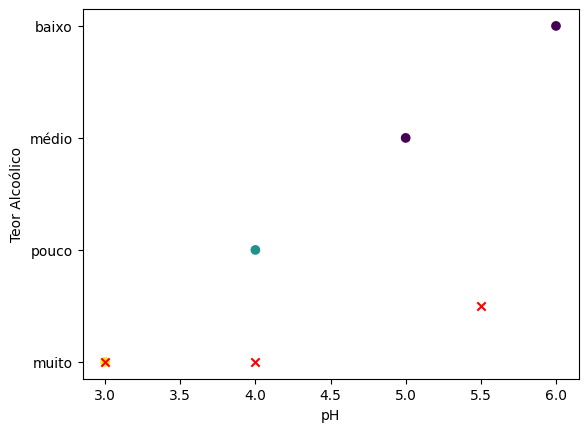

In [67]:
# Plotando o gráfico das visualizações

plt.scatter(dados_vinho['Teor Alcoolico'],dados_vinho['Acidez'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 0], centroids[:, 2], marker='x', color='red')

plt.xlabel("pH")
plt.ylabel("Teor Alcoólico")


In [68]:
print(labels)
print(centroids)

[2 1 0 0]
[[5.5  4.05 0.5  0.   0.5  0.  ]
 [4.   2.8  0.   0.   0.   1.  ]
 [3.   4.3  0.   1.   0.   0.  ]]


In [69]:
print(dados_vinhos)

   Teor Alcoolico   pH  Acidez_baixo  Acidez_muito  Acidez_médio  Acidez_pouco
0               3  4.3         False          True         False         False
1               4  2.8         False         False         False          True
2               5  4.2         False         False          True         False
3               6  3.9          True         False         False         False


In [70]:
dados_vinho

,Teor Alcoolico,Acidez,pH
0,3,muito,4.3
1,4,pouco,2.8
2,5,médio,4.2
3,6,baixo,3.9


In [73]:
# Passo 7: Analisar os grupos resultantes
dados_vinhos['Grupo'] = labels
grouped_data = dados_vinhos.groupby('Grupo').mean()
print(grouped_data)


       Teor Alcoolico    pH  Acidez_baixo  Acidez_muito  Acidez_médio  \
Grupo                                                                   
0                 5.5  4.05           0.5           0.0           0.5   
1                 4.0  2.80           0.0           0.0           0.0   
2                 3.0  4.30           0.0           1.0           0.0   

       Acidez_pouco  
Grupo                
0               0.0  
1               1.0  
2               0.0  
